# For subsets of ROI, look at Quality or Uncertainty vs. Correlation

In [1]:
import rioxarray as rxr
import xarray as xr
import numpy as np
import xrspatial as xrs
import geopandas as gpd
import pandas as pd
from scipy import stats
import math

import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
from dask.distributed import LocalCluster
cluster = LocalCluster(n_workers = 10, threads_per_worker = 10, memory_limit = 0) # Refined through testing
client = cluster.get_client()
client # Can open in other window by clicking 'Dashboard' link below

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 10
Total threads: 100,Total memory: 0 B
Status: running,Using processes: True
Comm: tcp://127.0.0.1:54406,Workers: 10
Dashboard: http://127.0.0.1:8787/status,Total threads: 100
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:54467,Total threads: 10
Dashboard: http://127.0.0.1:54472/status,Memory: 0 B
Nanny: tcp://127.0.0.1:54409,


## WinterYear Snow End

In [3]:
wy2223 = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear_roi\2223\HLS_Fmask_snow_end_winterYear2223_HBL.tif", masked = True).squeeze() # .load() chunks = 'auto'
#wy2223 = xrs.focal.mean(wy2223.squeeze()) # 3x3 Focal mean
wy2223

<xarray.DataArray (y: 32000, x: 46000)> Size: 6GB
[1472000000 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 368kB -7.102e+04 -7.1e+04 ... 1.309e+06 1.309e+06
  * y            (y) float64 256kB 1.135e+06 1.135e+06 ... 1.753e+05 1.753e+05
    spatial_ref  int64 8B 0
Attributes: (12/13)
    AREA_OR_POINT:           Area
    STATISTICS_COUNT:        437626315.0
    STATISTICS_COVARIANCES:  133.6703249568787
    STATISTICS_MAXIMUM:      230
    STATISTICS_MEAN:         130.43342892606
    STATISTICS_MEDIAN:       129.352941
    ...                      ...
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       11.561588340573
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               snow_end

In [4]:
wy2122 = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear_roi\2122\HLS_Fmask_snow_end_winterYear2122_HBL.tif", masked = True).squeeze() #.load() chunks = 'auto'
#wy2122 = xrs.focal.mean(wy2122.squeeze()) # 3x3 Focal mean
wy2122

<xarray.DataArray (y: 32000, x: 46000)> Size: 6GB
[1472000000 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 368kB -7.102e+04 -7.1e+04 ... 1.309e+06 1.309e+06
  * y            (y) float64 256kB 1.135e+06 1.135e+06 ... 1.753e+05 1.753e+05
    spatial_ref  int64 8B 0
Attributes: (12/13)
    AREA_OR_POINT:           Area
    STATISTICS_COUNT:        437634046.0
    STATISTICS_COVARIANCES:  107.792319731937
    STATISTICS_MAXIMUM:      237
    STATISTICS_MEAN:         131.03583166558
    STATISTICS_MEDIAN:       128.854902
    ...                      ...
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       10.382308015655
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               snow_end

In [5]:
wy2021 = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear_roi\2021\HLS_Fmask_snow_end_winterYear2021_HBL.tif", masked = True).squeeze() # .load() chunks = 'auto'
#wy2021 = xrs.focal.mean(wy2021.squeeze()) # 3x3 Focal mean
wy2021

<xarray.DataArray (y: 32000, x: 46000)> Size: 6GB
[1472000000 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 368kB -7.102e+04 -7.1e+04 ... 1.309e+06 1.309e+06
  * y            (y) float64 256kB 1.135e+06 1.135e+06 ... 1.753e+05 1.753e+05
    spatial_ref  int64 8B 0
Attributes: (12/13)
    AREA_OR_POINT:           Area
    STATISTICS_COUNT:        436925940.0
    STATISTICS_COVARIANCES:  358.3837979488593
    STATISTICS_MAXIMUM:      231
    STATISTICS_MEAN:         125.75298325399
    STATISTICS_MEDIAN:       124.898039
    ...                      ...
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       18.931027387568
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               snow_end

In [6]:
wy1920 = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear_roi\1920\HLS_Fmask_snow_end_winterYear1920_HBL.tif", masked = True).squeeze() #.load() , chunks = 'auto'
#wy1920 = xrs.focal.mean(wy1920.squeeze()) # 3x3 Focal mean
wy1920

<xarray.DataArray (y: 32000, x: 46000)> Size: 6GB
[1472000000 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 368kB -7.102e+04 -7.1e+04 ... 1.309e+06 1.309e+06
  * y            (y) float64 256kB 1.135e+06 1.135e+06 ... 1.753e+05 1.753e+05
    spatial_ref  int64 8B 0
Attributes: (12/13)
    AREA_OR_POINT:           Area
    STATISTICS_COUNT:        437608538.0
    STATISTICS_COVARIANCES:  126.3395326119207
    STATISTICS_MAXIMUM:      236
    STATISTICS_MEAN:         142.34371252057
    STATISTICS_MEDIAN:       140.0
    ...                      ...
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       11.240085969952
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               snow_end

In [7]:
wy1819 = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear_roi\1819\HLS_Fmask_snow_end_winterYear1819_HBL.tif", masked = True).squeeze() # .load() chunks = 'auto'
#wy1819 = xrs.focal.mean(wy1819.squeeze()) # 3x3 Focal mean
wy1819

<xarray.DataArray (y: 32000, x: 46000)> Size: 6GB
[1472000000 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 368kB -7.102e+04 -7.1e+04 ... 1.309e+06 1.309e+06
  * y            (y) float64 256kB 1.135e+06 1.135e+06 ... 1.753e+05 1.753e+05
    spatial_ref  int64 8B 0
Attributes: (12/14)
    TIFFTAG_SOFTWARE:        GDAL 3.7.0e (3070046) (4.5.1;1700;3.0.0;2.0.7;;;...
    AREA_OR_POINT:           Area
    STATISTICS_COUNT:        437623483.0
    STATISTICS_COVARIANCES:  197.4241244999606
    STATISTICS_MAXIMUM:      235
    STATISTICS_MEAN:         132.44826902724
    ...                      ...
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       14.050769534085
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               snow_end

## WinterYear Snow End Uncertainty

In [8]:
wy2223u = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear_roi\2223\HLS_Fmask_snow_end_u_winterYear2223_HBL.tif", masked = True).squeeze() # .load() chunks = 'auto'
#wy2223 = xrs.focal.mean(wy2223.squeeze()) # 3x3 Focal mean
wy2223u

<xarray.DataArray (y: 32000, x: 46000)> Size: 6GB
[1472000000 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 368kB -7.102e+04 -7.1e+04 ... 1.309e+06 1.309e+06
  * y            (y) float64 256kB 1.135e+06 1.135e+06 ... 1.753e+05 1.753e+05
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      snow_end_u

In [9]:
wy2122u = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear_roi\2122\HLS_Fmask_snow_end_u_winterYear2122_HBL.tif", masked = True).squeeze() # .load() , chunks = 'auto'
#wy2122 = xrs.focal.mean(wy2122.squeeze()) # 3x3 Focal mean
wy2122u

<xarray.DataArray (y: 32000, x: 46000)> Size: 6GB
[1472000000 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 368kB -7.102e+04 -7.1e+04 ... 1.309e+06 1.309e+06
  * y            (y) float64 256kB 1.135e+06 1.135e+06 ... 1.753e+05 1.753e+05
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      snow_end_u

In [10]:
wy2021u = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear_roi\2021\HLS_Fmask_snow_end_u_winterYear2021_HBL.tif", masked = True).squeeze() # .load() , chunks = 'auto'
#wy2021 = xrs.focal.mean(wy2021.squeeze()) # 3x3 Focal mean
wy2021u

<xarray.DataArray (y: 32000, x: 46000)> Size: 6GB
[1472000000 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 368kB -7.102e+04 -7.1e+04 ... 1.309e+06 1.309e+06
  * y            (y) float64 256kB 1.135e+06 1.135e+06 ... 1.753e+05 1.753e+05
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      snow_end_u

In [11]:
wy1920u = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear_roi\1920\HLS_Fmask_snow_end_u_winterYear1920_HBL.tif", masked = True).squeeze() # .load() , chunks = 'auto'
#wy1920 = xrs.focal.mean(wy1920.squeeze()) # 3x3 Focal mean
wy1920u

<xarray.DataArray (y: 32000, x: 46000)> Size: 6GB
[1472000000 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 368kB -7.102e+04 -7.1e+04 ... 1.309e+06 1.309e+06
  * y            (y) float64 256kB 1.135e+06 1.135e+06 ... 1.753e+05 1.753e+05
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      snow_end_u

In [12]:
wy1819u = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear_roi\1819\HLS_Fmask_snow_end_u_winterYear1819_HBL.tif", masked = True).squeeze() # .load() , chunks = 'auto'
#wy1819 = xrs.focal.mean(wy1819.squeeze()) # 3x3 Focal mean
wy1819u

<xarray.DataArray (y: 32000, x: 46000)> Size: 6GB
[1472000000 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 368kB -7.102e+04 -7.1e+04 ... 1.309e+06 1.309e+06
  * y            (y) float64 256kB 1.135e+06 1.135e+06 ... 1.753e+05 1.753e+05
    spatial_ref  int64 8B 0
Attributes: (12/13)
    AREA_OR_POINT:           Area
    STATISTICS_COUNT:        437623483.0
    STATISTICS_COVARIANCES:  22.68366693003863
    STATISTICS_MAXIMUM:      64.5
    STATISTICS_MEAN:         5.4124413840075
    STATISTICS_MEDIAN:       4.3
    ...                      ...
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       4.7627373358226
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               snow_end_u

## Snow End Interannual Data

In [13]:
# mn1823 = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\HBL\TemporalSnow\Fmask_V1\Products2\interannual_roi\HLS_Fmask_snow_end_mn_1823_HBL3x3.tif", masked = True).squeeze().load()
# mn1823

In [14]:
# mnq1823 = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\HBL\TemporalSnow\Fmask_V1\Products2\interannual_roi\HLS_Fmask_snow_end_q_mn_1823_HBL3x3.tif", masked = True).squeeze().load()
# mnq1823

In [15]:
# bv1823 = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\HBL\TemporalSnow\Fmask_V1\Products2\interannual_roi\HLS_Fmask_snow_end_bv_1823_HBL3x3.tif", masked = True).squeeze().load()
# bv1823

In [16]:
# bvq1823 = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\HBL\TemporalSnow\Fmask_V1\Products2\interannual_roi\HLS_Fmask_snow_end_bvq_1823_HBL3x3.tif", masked = True).squeeze().load()
# bvq1823

In [17]:
# bvy1823 = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\HBL\TemporalSnow\Fmask_V1\Products2\interannual_roi\HLS_Fmask_snow_end_bvy_1823_HBL3x3.tif", masked = True).squeeze().load()
# bvy1823

## Subfishnet (10 x 10 km)

In [18]:
#tile_list = [828, 829, 830, 904, 905, 906, 988, 989, 990] # For 3x3 test area only
fishnet = gpd.read_file(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\HBL\TemporalSnow\AA\Regional Snow Dynamics\canadaFishnet_60km_sub10km_HBLclip.shp")
#fishnet = fishnet[fishnet['ID'].isin(tile_list)] # HBL3x3
fishnet

,ID,ID_sub,geometry
0,365,16,"POLYGON ((638171.882 201462.446, 636878.257 20..."
1,365,17,"POLYGON ((648972.823 196065.864, 648630.883 19..."
2,365,22,"POLYGON ((635722.827 205276.489, 635792.132 20..."
3,365,23,"POLYGON ((638972.823 205276.489, 638972.823 21..."
4,365,28,"POLYGON ((638714.128 215276.489, 638972.823 21..."
...,...,...,...
4316,1544,8,"MULTIPOLYGON (((68972.823 1085276.489, 68972.8..."
4317,1544,9,"POLYGON ((78972.823 1085276.489, 78972.823 108..."
4318,1544,10,"POLYGON ((92842.641 1085276.489, 93214.728 108..."
4319,1544,11,"POLYGON ((98972.823 1085276.489, 98972.823 108..."


## Just once, get interannual values by subfishnet

In [19]:
# mn = [] # Weighted mean (mean)
# mnq = [] # Weighted mean quality (mean)
# bv = [] # Best value (mean)
# bvq = [] # Best value quality (mean)
# bvy = [] # Best value year (mode)
# bvyp = [] # Best value year (%)

# for square in tqdm(fishnet.index):

#     # Define square
#     square = fishnet[fishnet.index == square]

#     # # Use square bounds to select subarea (instant, very minor error in correlations because 1 pixel off sometimes)
#     # minx, miny, maxx, maxy = square.geometry.values[0].bounds

#     # xs = [minx]
#     # val = minx
#     # while val <= maxx - 30:
#     #     val += 30
#     #     xs.append(val)

#     # ys = [miny]
#     # val = miny
#     # while val <= maxy - 30:
#     #     val += 30
#     #     ys.append(val)

#     # Mean weighted mean for each square
#     #clip1 = yr1.sel(x = xs, y = ys, method = 'nearest') # Instant
#     # Using clip is accurate to subfishnet square, but takes longer
#     clip = mn1823.rio.clip(square.geometry.values) # Use clip dims later for faster values, # 400 ms
#     mn.append(clip.mean(skipna = True).item())

#     # Mean weighted mean quality for each square 
#     mnq_clip = mnq1823.sel(x = clip['x'], y = clip['y']) # Select same ones from clip to match fast 
#     mnq.append(mnq_clip.mean(skipna = True).item())

#     # Mean best value for each square
#     bv_clip = bv1823.sel(x = clip['x'], y = clip['y']) # Select same ones from clip to match fast 
#     bv.append(bv_clip.mean(skipna = True).item())

#     # Mean best value quality for each square
#     bvq_clip = bvq1823.sel(x = clip['x'], y = clip['y']) # Select same ones from clip to match fast 
#     bvq.append(bvq_clip.mean(skipna = True).item())   

#     # Mode best value year for each square
#     bvy_clip = bvy1823.sel(x = clip['x'], y = clip['y']) # Select same ones from clip to match fast  base = base[~np.isnan(base)]
#     arr = bvy_clip.values.flatten()
#     arr = arr[~np.isnan(arr)]
#     mode = stats.mode(arr)
#     bvy.append(mode[0].item())
#     bvyp.append(mode[1].item() / bvy_clip.notnull().sum().values * 100)

In [20]:
# pd.DataFrame(mn).hist()
# sum(math.isnan(x) for x in mn)

In [21]:
# pd.DataFrame(mnq).hist()
# sum(math.isnan(x) for x in mnq)

In [22]:
# pd.DataFrame(bv).hist()
# sum(math.isnan(x) for x in bv)

In [23]:
# pd.DataFrame(bvq).hist()
# sum(math.isnan(x) for x in bvq)

In [24]:
# pd.DataFrame(bvy).hist()
# sum(math.isnan(x) for x in bvy)

In [25]:
# pd.DataFrame(bvyp).hist()
# sum(math.isnan(x) for x in bvyp)

In [26]:
# fishnet['mn1823'] = mn
# fishnet['mnq1823'] = mnq
# fishnet['bv1823'] = bv
# fishnet['bvq1823'] = bvq
# fishnet['bvy1823'] = bvy
# fishnet['bvyp1823'] = bvyp
# fishnet

## Get winter year values and uncertainty by subfishnet

In [27]:
# end23 = []
# end22 = []
# end21 = []
# end20 = []
# end19 = []

# endu23 = []
# endu22 = []
# endu21 = []
# endu20 = []
# endu19 = []

# for square in tqdm(fishnet.index):

#     # Define square
#     square = fishnet[fishnet.index == square]

#     ### Mean value ###

#     # Mean value winter year 2022-2023
#     clip = wy2223.rio.clip(square.geometry.values) # 400 ms # Using clip is accurate to subfishnet square, but takes longer
#     end23.append(clip.mean(skipna = True).item())

#     # Mean value winter year 2021-2022
#     end22_clip = wy2122.sel(x = clip['x'], y = clip['y']) # Select same ones from second year to match
#     end22.append(end22_clip.mean(skipna = True).item())

#     # Mean value winter year 2020-2021
#     end21_clip = wy2021.sel(x = clip['x'], y = clip['y']) # Select same ones from second year to match
#     end21.append(end21_clip.mean(skipna = True).item())   

#     # Mean value winter year 2019-2020
#     end20_clip = wy1920.sel(x = clip['x'], y = clip['y']) # Select same ones from second year to match
#     end20.append(end20_clip.mean(skipna = True).item())

#     # Mean value winter year 2018-2019
#     end19_clip = wy1819.sel(x = clip['x'], y = clip['y']) # Select same ones from second year to match
#     end19.append(end19_clip.mean(skipna = True).item())

#     ### Mean uncertainty value ###

#     # Mean uncertainty value winter year 2022-2023
#     endu23_clip = wy2223u.sel(x = clip['x'], y = clip['y']) # Select same ones from second year to match
#     endu23.append(endu23_clip.mean(skipna = True).item())

#     # Mean uncertainty value winter year 2021-2022
#     endu22_clip = wy2122u.sel(x = clip['x'], y = clip['y']) # Select same ones from second year to match
#     endu22.append(endu22_clip.mean(skipna = True).item())

#     # Mean uncertainty value winter year 2020-2021
#     endu21_clip = wy2021u.sel(x = clip['x'], y = clip['y']) # Select same ones from second year to match
#     endu21.append(endu21_clip.mean(skipna = True).item())   

#     # Mean uncertainty value winter year 2019-2020
#     endu20_clip = wy1920u.sel(x = clip['x'], y = clip['y']) # Select same ones from second year to match
#     endu20.append(endu20_clip.mean(skipna = True).item())

#     # Mean uncertainty value winter year 2018-2019
#     endu19_clip = wy1819u.sel(x = clip['x'], y = clip['y']) # Select same ones from second year to match
#     endu19.append(endu19_clip.mean(skipna = True).item())

In [28]:
# pd.DataFrame(end23).hist()
# sum(math.isnan(x) for x in end23)

In [29]:
# pd.DataFrame(end22).hist()
# sum(math.isnan(x) for x in end22)

In [30]:
# pd.DataFrame(end21).hist()
# sum(math.isnan(x) for x in end21)

In [31]:
# pd.DataFrame(end20).hist()
# sum(math.isnan(x) for x in end20)

In [32]:
# pd.DataFrame(end19).hist()
# sum(math.isnan(x) for x in end19)

In [33]:
# pd.DataFrame(endu23).hist()
# sum(math.isnan(x) for x in endu23)

In [34]:
# pd.DataFrame(endu22).hist()
# sum(math.isnan(x) for x in endu22)

In [35]:
# pd.DataFrame(endu21).hist()
# sum(math.isnan(x) for x in endu21)

In [36]:
# pd.DataFrame(endu20).hist()
# sum(math.isnan(x) for x in endu20)

In [37]:
# pd.DataFrame(endu19).hist()
# sum(math.isnan(x) for x in endu19)

In [38]:
# fishnet['end23'] = end23
# fishnet['end22'] = end22
# fishnet['end21'] = end21
# fishnet['end20'] = end20
# fishnet['end19'] = end19
# fishnet['end23u'] = endu23
# fishnet['end22u'] = endu23
# fishnet['end21u'] = endu21
# fishnet['end20u'] = endu20
# fishnet['end19u'] = endu19
# fishnet

## Get winter year correlations and mean uncertainty by subfishnet

In [39]:
cor2322 = []
cor2321 = []
cor2320 = []
cor2319 = []
cor2221 = []
cor2220 = []
cor2219 = []
cor2120 = []
cor2119 = []
cor2019 = []

u2322 = []
u2321 = []
u2320 = []
u2319 = []
u2221 = []
u2220 = []
u2219 = []
u2120 = []
u2119 = []
u2019 = []

for square in tqdm(fishnet.index):

    # Define square
    square = fishnet[fishnet.index == square]

    ### 2-year correlations ###

    # 2023 - 2022 Correlation
    clip = wy2223.rio.clip(square.geometry.values)
    wy22_clip = wy2122.sel(x = clip['x'], y = clip['y'])
    cor2322.append(xr.corr(clip, wy22_clip, dim = ['x', 'y']).values.item())
    
    # 2023 - 2021 Correlation
    wy21_clip = wy2021.sel(x = clip['x'], y = clip['y'])
    cor2321.append(xr.corr(clip, wy21_clip, dim = ['x', 'y']).values.item())
    
    # 2023 - 2020 Correlation
    wy20_clip = wy1920.sel(x = clip['x'], y = clip['y'])
    cor2320.append(xr.corr(clip, wy20_clip, dim = ['x', 'y']).values.item())
    
    # 2023 - 2019 Correlation
    wy19_clip = wy1819.sel(x = clip['x'], y = clip['y'])
    cor2319.append(xr.corr(clip, wy19_clip, dim = ['x', 'y']).values.item())
    
    # 2022 - 2021 Correlation
    cor2221.append(xr.corr(wy22_clip, wy21_clip, dim = ['x', 'y']).values.item())
    
    # 2022 - 2020 Correlation
    cor2220.append(xr.corr(wy22_clip, wy20_clip, dim = ['x', 'y']).values.item())
    
    # 2022 - 2019 Correlation
    cor2219.append(xr.corr(wy22_clip, wy19_clip, dim = ['x', 'y']).values.item())
    
    # 2021 - 2020 Correlation
    cor2120.append(xr.corr(wy21_clip, wy20_clip, dim = ['x', 'y']).values.item())
    
    # 2021 - 2019 Correlation
    cor2119.append(xr.corr(wy21_clip, wy19_clip, dim = ['x', 'y']).values.item())

    # 2020 - 2019 Correlation
    cor2019.append(xr.corr(wy20_clip, wy19_clip, dim = ['x', 'y']).values.item())

    ### 2-year mean uncertainties ###
    #yrs_unc = (yr1u + yr2u) / 2 # Uncertainty mean across the 2 years

    # 2023 - 2022 Mean uncertainty
    wy23u_clip = wy2223u.sel(x = clip['x'], y = clip['y'])
    wy22u_clip = wy2122u.sel(x = clip['x'], y = clip['y'])
    u2322.append(((wy23u_clip + wy22u_clip) / 2).mean(skipna = True).item())
    
    # 2023 - 2021 Mean uncertainty
    wy21u_clip = wy2021u.sel(x = clip['x'], y = clip['y'])
    u2321.append(((wy23u_clip + wy21u_clip) / 2).mean(skipna = True).item())
    
    # 2023 - 2020 Mean uncertainty
    wy20u_clip = wy1920u.sel(x = clip['x'], y = clip['y'])
    u2320.append(((wy23u_clip + wy20u_clip) / 2).mean(skipna = True).item())
    
    # 2023 - 2019 Mean uncertainty
    wy19u_clip = wy1819u.sel(x = clip['x'], y = clip['y'])
    u2319.append(((wy23u_clip + wy19u_clip) / 2).mean(skipna = True).item())
    
    # 2022 - 2021 Mean uncertainty
    u2221.append(((wy22u_clip + wy21u_clip) / 2).mean(skipna = True).item())
    
    # 2022 - 2020 Mean uncertainty
    u2220.append(((wy22u_clip + wy20u_clip) / 2).mean(skipna = True).item())
    
    # 2022 - 2019 Mean uncertainty
    u2219.append(((wy22u_clip + wy19u_clip) / 2).mean(skipna = True).item())
    
    # 2021 - 2020 Mean uncertainty
    u2120.append(((wy21u_clip + wy20u_clip) / 2).mean(skipna = True).item())
    
    # 2021 - 2019 Mean uncertainty
    u2119.append(((wy21u_clip + wy19u_clip) / 2).mean(skipna = True).item())
    
    # 2020 - 2019 Mean uncertainty
    u2019.append(((wy20u_clip + wy19u_clip) / 2).mean(skipna = True).item())

100%|███████████████████████████████████████████████████████████████████████████| 4321/4321 [49:38:34<00:00, 41.36s/it]


19

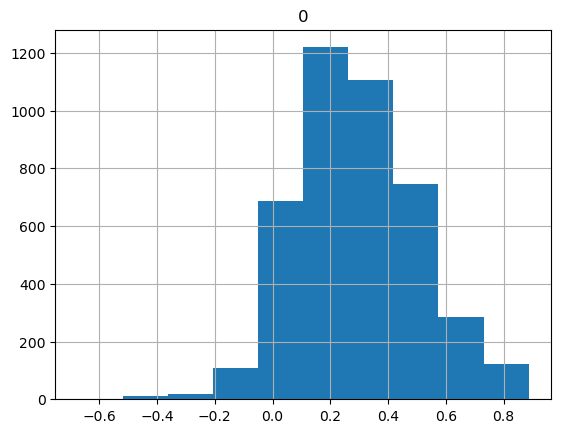

In [40]:
pd.DataFrame(cor2322).hist()
sum(math.isnan(x) for x in cor2322)

22

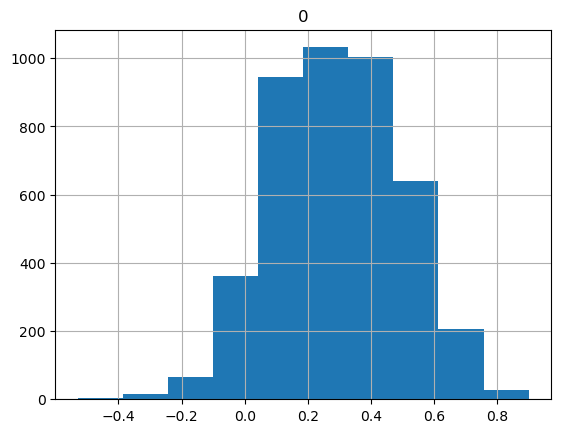

In [41]:
pd.DataFrame(cor2321).hist()
sum(math.isnan(x) for x in cor2321)

24

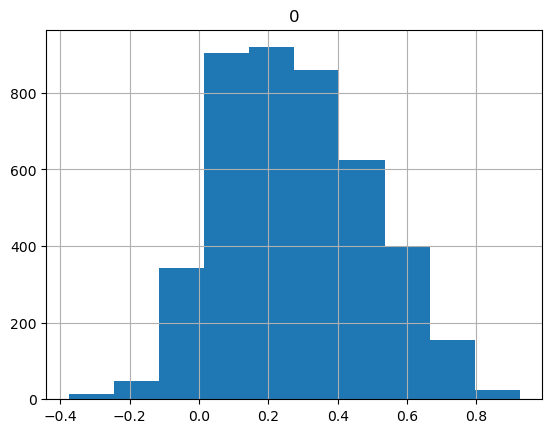

In [42]:
pd.DataFrame(cor2320).hist()
sum(math.isnan(x) for x in cor2320)

20

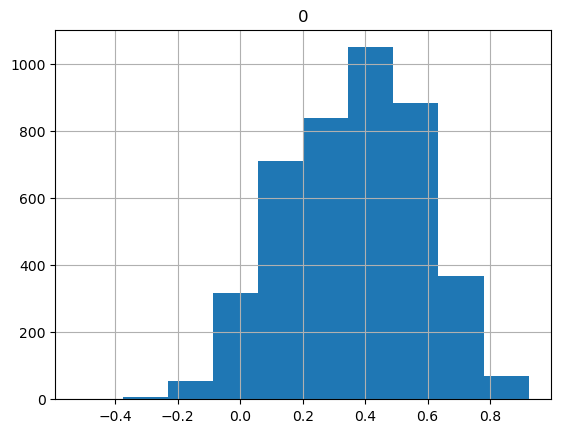

In [43]:
pd.DataFrame(cor2319).hist()
sum(math.isnan(x) for x in cor2319)

15

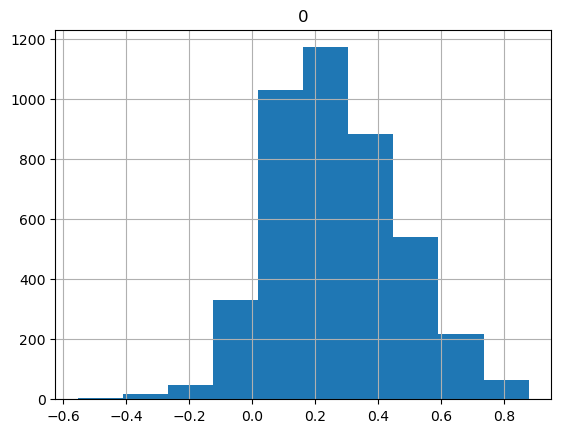

In [44]:
pd.DataFrame(cor2221).hist()
sum(math.isnan(x) for x in cor2221)

18

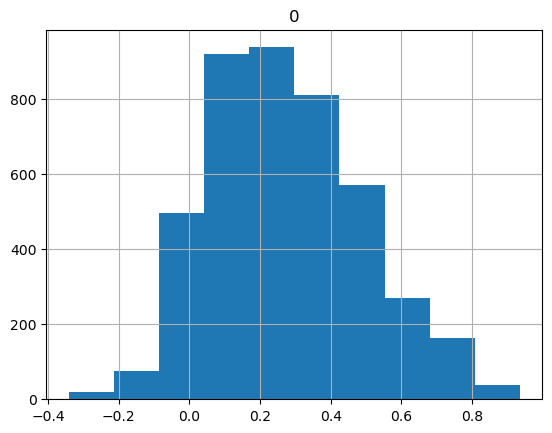

In [45]:
pd.DataFrame(cor2220).hist()
sum(math.isnan(x) for x in cor2220)

14

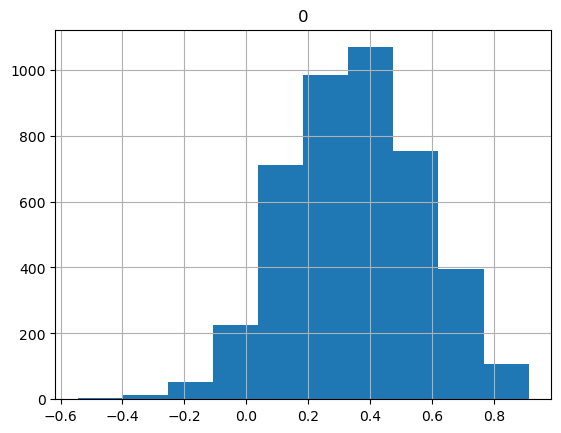

In [46]:
pd.DataFrame(cor2219).hist()
sum(math.isnan(x) for x in cor2219)

22

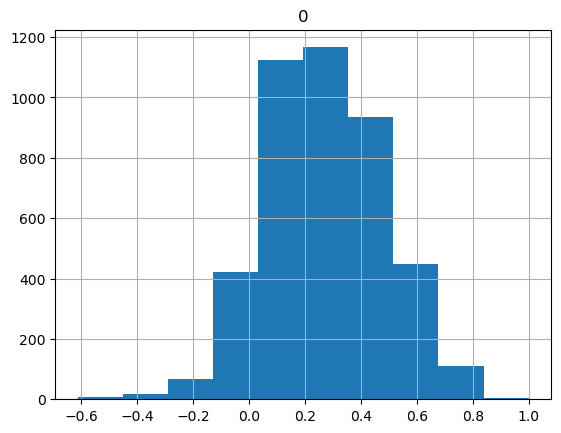

In [47]:
pd.DataFrame(cor2120).hist()
sum(math.isnan(x) for x in cor2120)

16

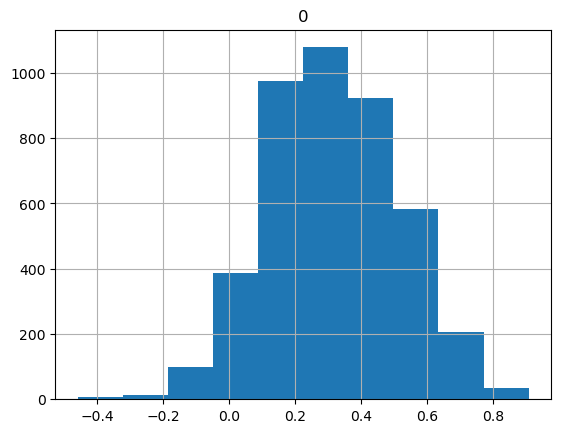

In [48]:
pd.DataFrame(cor2119).hist()
sum(math.isnan(x) for x in cor2119)

22

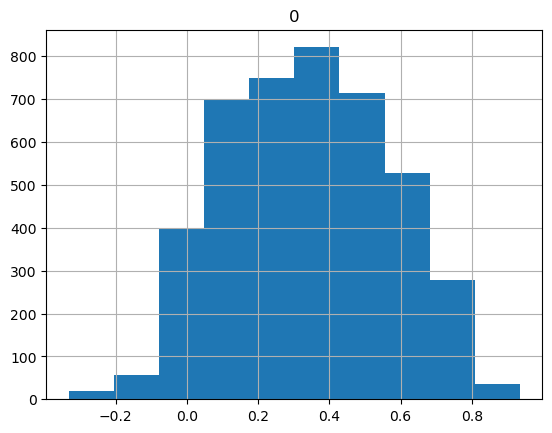

In [49]:
pd.DataFrame(cor2019).hist()
sum(math.isnan(x) for x in cor2019)

0

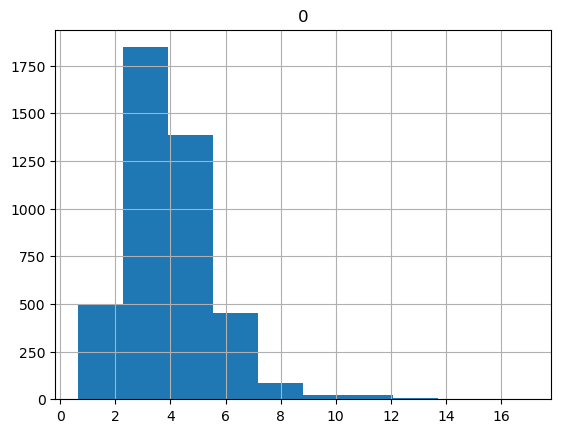

In [50]:
pd.DataFrame(u2322).hist()
sum(math.isnan(x) for x in u2322)

0

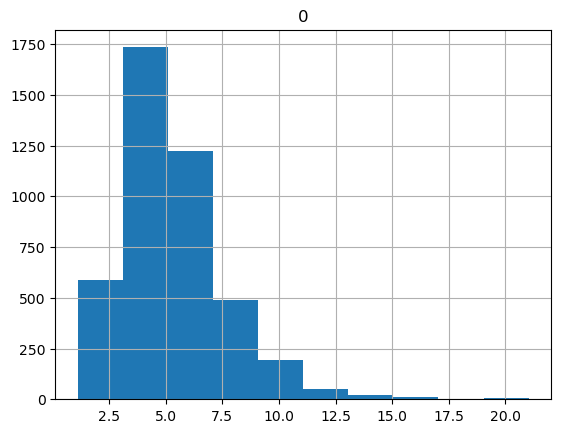

In [51]:
pd.DataFrame(u2321).hist()
sum(math.isnan(x) for x in u2321)

0

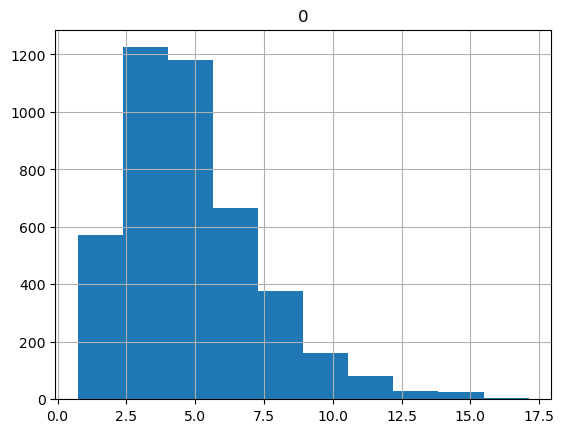

In [52]:
pd.DataFrame(u2320).hist()
sum(math.isnan(x) for x in u2320)

0

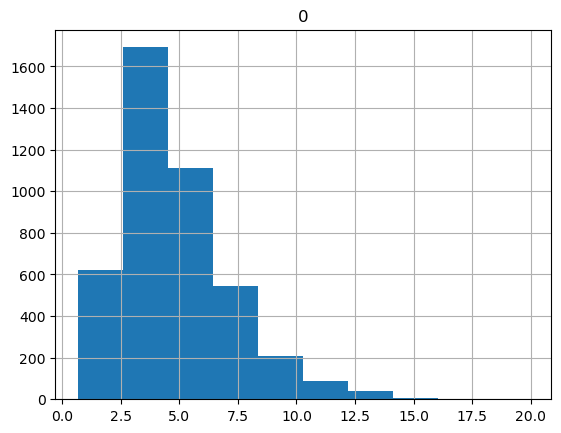

In [53]:
pd.DataFrame(u2319).hist()
sum(math.isnan(x) for x in u2319)

0

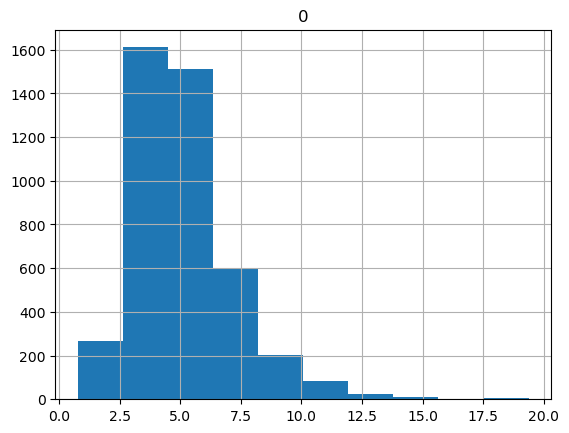

In [54]:
pd.DataFrame(u2221).hist()
sum(math.isnan(x) for x in u2221)

0

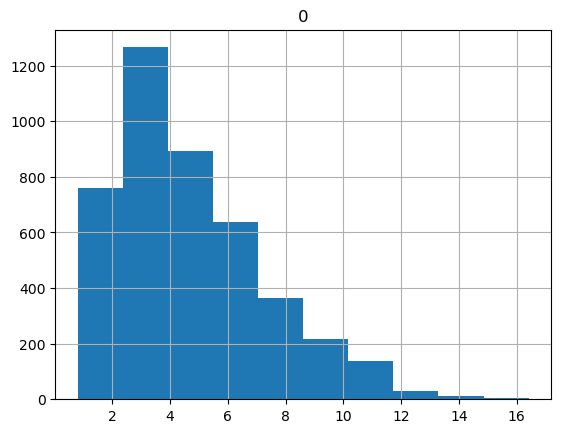

In [55]:
pd.DataFrame(u2220).hist()
sum(math.isnan(x) for x in u2220)

0

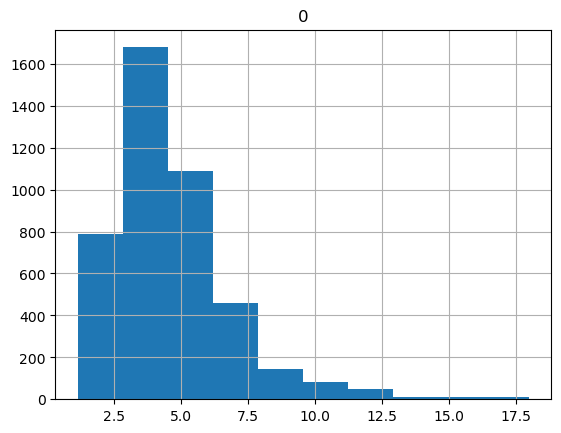

In [56]:
pd.DataFrame(u2219).hist()
sum(math.isnan(x) for x in u2219)

0

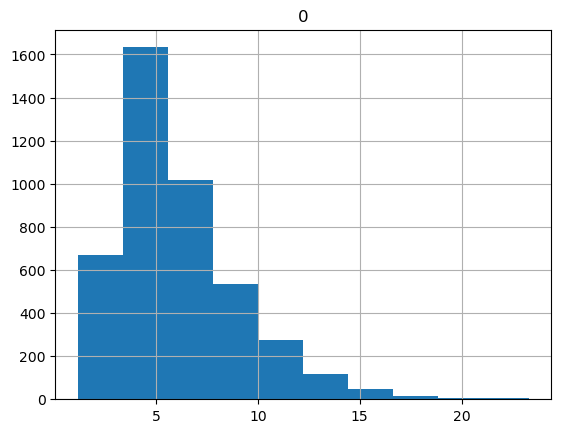

In [57]:
pd.DataFrame(u2120).hist()
sum(math.isnan(x) for x in u2120)

0

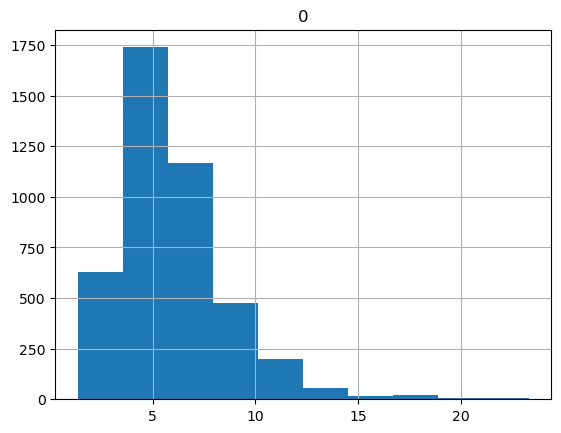

In [58]:
pd.DataFrame(u2119).hist()
sum(math.isnan(x) for x in u2119)

0

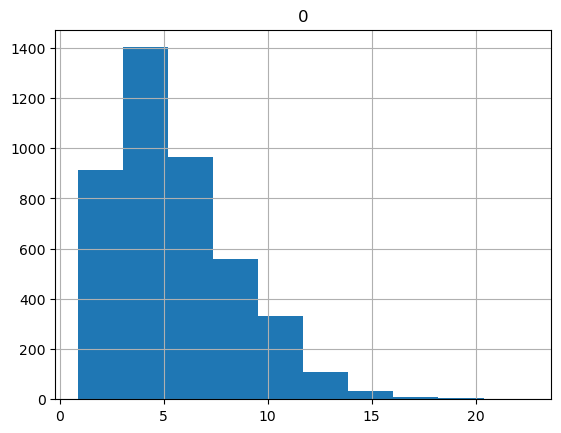

In [59]:
pd.DataFrame(u2019).hist()
sum(math.isnan(x) for x in u2019)

In [60]:
fishnet['cor2322'] = cor2322
fishnet['cor2321'] = cor2321
fishnet['cor2320'] = cor2320
fishnet['cor2319'] = cor2319
fishnet['cor2221'] = cor2221
fishnet['cor2220'] = cor2220
fishnet['cor2219'] = cor2219
fishnet['cor2120'] = cor2120
fishnet['cor2119'] = cor2119
fishnet['cor2019'] = cor2019
fishnet['u2322'] = u2322
fishnet['u2321'] = u2321
fishnet['u2320'] = u2320
fishnet['u2319'] = u2319
fishnet['u2221'] = u2221
fishnet['u2220'] = u2220
fishnet['u2219'] = u2219
fishnet['u2120'] = u2120
fishnet['u2119'] = u2119
fishnet['u2019'] = u2019
fishnet

,ID,ID_sub,geometry,cor2322,cor2321,cor2320,cor2319,cor2221,cor2220,cor2219,...,u2322,u2321,u2320,u2319,u2221,u2220,u2219,u2120,u2119,u2019
0,365,16,"POLYGON ((638171.882 201462.446, 636878.257 20...",0.466978,0.505905,0.490521,0.188356,0.348266,0.273793,0.307002,...,5.734807,2.680294,2.585659,6.633316,6.135075,6.040441,10.088098,2.985927,7.033584,6.938949
1,365,17,"POLYGON ((648972.823 196065.864, 648630.883 19...",0.370750,0.483067,0.457162,0.183158,0.477380,0.370783,0.083934,...,3.865227,2.932135,2.691212,5.471535,4.391763,4.150840,6.931163,3.217747,5.998070,5.757148
2,365,22,"POLYGON ((635722.827 205276.489, 635792.132 20...",0.833939,0.623655,0.903596,0.780718,0.505717,0.816568,0.734943,...,4.713970,3.036150,2.573881,5.216837,5.552094,5.089826,7.732782,3.412006,6.054962,5.592694
3,365,23,"POLYGON ((638972.823 205276.489, 638972.823 21...",0.603787,0.604335,0.668611,0.543983,0.611690,0.563006,0.428144,...,3.937327,3.497915,2.626009,4.007649,5.088904,4.216999,5.598639,3.777586,5.159227,4.287321
4,365,28,"POLYGON ((638714.128 215276.489, 638972.823 21...",NaN,NaN,NaN,-0.052861,NaN,NaN,NaN,...,3.426829,6.426829,2.676829,6.310976,6.500000,2.750000,6.384146,5.750000,9.384147,5.634146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4316,1544,8,"MULTIPOLYGON (((68972.823 1085276.489, 68972.8...",-0.002569,0.066347,0.071131,-0.049211,-0.110298,0.148838,0.094674,...,2.803104,3.636579,3.678831,4.827170,3.224115,3.266368,4.414707,4.099843,5.248181,5.290434
4317,1544,9,"POLYGON ((78972.823 1085276.489, 78972.823 108...",-0.017267,0.005857,0.107491,0.012502,0.034824,-0.012160,-0.003458,...,3.069328,7.444650,3.654643,7.644200,6.956298,3.166292,7.155849,7.541613,11.531170,7.741163
4318,1544,10,"POLYGON ((92842.641 1085276.489, 93214.728 108...",-0.000690,0.138779,0.046326,0.151952,-0.247692,0.000687,0.043037,...,5.370543,12.099764,6.431997,8.312094,8.729811,3.062045,4.942141,9.791265,11.671361,6.003595
4319,1544,11,"POLYGON ((98972.823 1085276.489, 98972.823 108...",-0.110292,0.169543,0.040992,0.193018,-0.028148,-0.003633,-0.003559,...,3.906142,9.944963,4.326260,6.409075,9.075051,3.456349,5.539165,9.495169,11.577985,5.959282


In [61]:
fishnet.to_file('subfishnet_HBL_SDC_QUvCorr.shp')

## Plotting
- Can make maps in ArcGIS Pro as well...

In [2]:
fishnet = gpd.read_file(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\HBL\TemporalSnow\AA\Snow Dynamics Consistency\subfishnet_HBL_SDC_QUvCorr.shp")
fishnet

,ID,ID_sub,cor2322,cor2321,cor2320,cor2319,cor2221,cor2220,cor2219,cor2120,...,u2321,u2320,u2319,u2221,u2220,u2219,u2120,u2119,u2019,geometry
0,365,16,0.466978,0.505905,0.490521,0.188356,0.348266,0.273793,0.307002,0.621459,...,2.680294,2.585659,6.633316,6.135075,6.040441,10.088098,2.985927,7.033584,6.938949,"POLYGON ((638171.882 201462.446, 636878.257 20..."
1,365,17,0.370750,0.483067,0.457162,0.183158,0.477380,0.370783,0.083934,0.523425,...,2.932135,2.691212,5.471535,4.391763,4.150840,6.931163,3.217747,5.998070,5.757148,"POLYGON ((648972.823 196065.864, 648630.883 19..."
2,365,22,0.833939,0.623655,0.903596,0.780718,0.505717,0.816568,0.734943,0.587174,...,3.036150,2.573881,5.216837,5.552094,5.089826,7.732782,3.412006,6.054962,5.592694,"POLYGON ((635722.827 205276.489, 635792.132 20..."
3,365,23,0.603787,0.604335,0.668611,0.543983,0.611690,0.563006,0.428144,0.653953,...,3.497915,2.626009,4.007649,5.088904,4.216999,5.598639,3.777586,5.159227,4.287321,"POLYGON ((638972.823 205276.489, 638972.823 21..."
4,365,28,NaN,NaN,NaN,-0.052861,NaN,NaN,NaN,NaN,...,6.426829,2.676829,6.310976,6.500000,2.750000,6.384146,5.750000,9.384147,5.634146,"POLYGON ((638714.128 215276.489, 638972.823 21..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4316,1544,8,-0.002569,0.066347,0.071131,-0.049211,-0.110298,0.148838,0.094674,0.006730,...,3.636579,3.678831,4.827170,3.224115,3.266368,4.414707,4.099843,5.248181,5.290434,"MULTIPOLYGON (((68972.823 1085276.489, 68972.8..."
4317,1544,9,-0.017267,0.005857,0.107491,0.012502,0.034824,-0.012160,-0.003458,-0.103884,...,7.444650,3.654643,7.644200,6.956298,3.166292,7.155849,7.541613,11.531170,7.741163,"POLYGON ((78972.823 1085276.489, 78972.823 108..."
4318,1544,10,-0.000690,0.138779,0.046326,0.151952,-0.247692,0.000687,0.043037,0.096924,...,12.099764,6.431997,8.312094,8.729811,3.062045,4.942141,9.791265,11.671361,6.003595,"POLYGON ((92842.641 1085276.489, 93214.728 108..."
4319,1544,11,-0.110292,0.169543,0.040992,0.193018,-0.028148,-0.003633,-0.003559,0.018869,...,9.944963,4.326260,6.409075,9.075051,3.456349,5.539165,9.495169,11.577985,5.959282,"POLYGON ((98972.823 1085276.489, 98972.823 108..."


<Axes: >

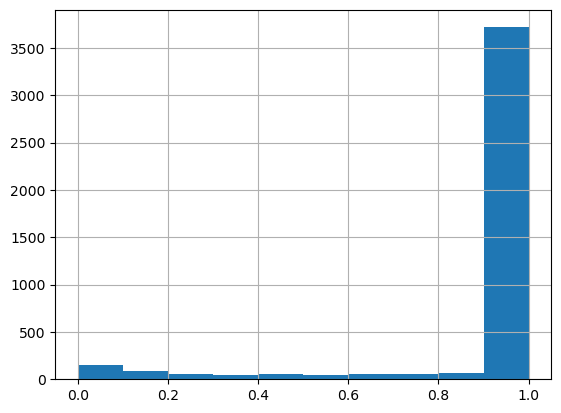

In [3]:
(fishnet.area / fishnet.area.max()).hist()  # Weight based on area

-0.4741048389205404


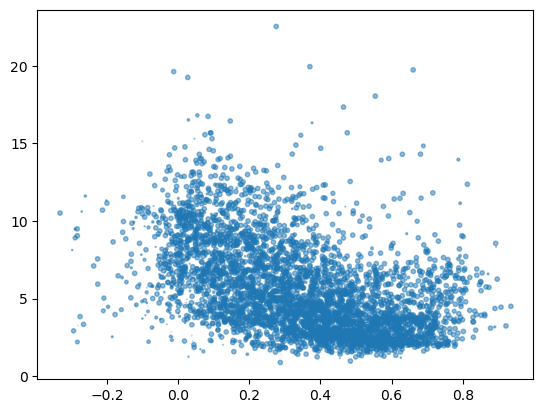

In [44]:
years = '2019'
plt.scatter(x = fishnet['cor' + years], y = fishnet['u' + years], s = fishnet.area / fishnet.area.max() * 10, alpha = 0.5)
print(fishnet['cor' + years].corr(fishnet['u' + years]))

In [31]:
fishnet

,ID,ID_sub,cor2322,cor2321,cor2320,cor2319,cor2221,cor2220,cor2219,cor2120,...,u2321,u2320,u2319,u2221,u2220,u2219,u2120,u2119,u2019,geometry
0,365,16,0.466978,0.505905,0.490521,0.188356,0.348266,0.273793,0.307002,0.621459,...,2.680294,2.585659,6.633316,6.135075,6.040441,10.088098,2.985927,7.033584,6.938949,"POLYGON ((638171.882 201462.446, 636878.257 20..."
1,365,17,0.370750,0.483067,0.457162,0.183158,0.477380,0.370783,0.083934,0.523425,...,2.932135,2.691212,5.471535,4.391763,4.150840,6.931163,3.217747,5.998070,5.757148,"POLYGON ((648972.823 196065.864, 648630.883 19..."
2,365,22,0.833939,0.623655,0.903596,0.780718,0.505717,0.816568,0.734943,0.587174,...,3.036150,2.573881,5.216837,5.552094,5.089826,7.732782,3.412006,6.054962,5.592694,"POLYGON ((635722.827 205276.489, 635792.132 20..."
3,365,23,0.603787,0.604335,0.668611,0.543983,0.611690,0.563006,0.428144,0.653953,...,3.497915,2.626009,4.007649,5.088904,4.216999,5.598639,3.777586,5.159227,4.287321,"POLYGON ((638972.823 205276.489, 638972.823 21..."
4,365,28,NaN,NaN,NaN,-0.052861,NaN,NaN,NaN,NaN,...,6.426829,2.676829,6.310976,6.500000,2.750000,6.384146,5.750000,9.384147,5.634146,"POLYGON ((638714.128 215276.489, 638972.823 21..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4316,1544,8,-0.002569,0.066347,0.071131,-0.049211,-0.110298,0.148838,0.094674,0.006730,...,3.636579,3.678831,4.827170,3.224115,3.266368,4.414707,4.099843,5.248181,5.290434,"MULTIPOLYGON (((68972.823 1085276.489, 68972.8..."
4317,1544,9,-0.017267,0.005857,0.107491,0.012502,0.034824,-0.012160,-0.003458,-0.103884,...,7.444650,3.654643,7.644200,6.956298,3.166292,7.155849,7.541613,11.531170,7.741163,"POLYGON ((78972.823 1085276.489, 78972.823 108..."
4318,1544,10,-0.000690,0.138779,0.046326,0.151952,-0.247692,0.000687,0.043037,0.096924,...,12.099764,6.431997,8.312094,8.729811,3.062045,4.942141,9.791265,11.671361,6.003595,"POLYGON ((92842.641 1085276.489, 93214.728 108..."
4319,1544,11,-0.110292,0.169543,0.040992,0.193018,-0.028148,-0.003633,-0.003559,0.018869,...,9.944963,4.326260,6.409075,9.075051,3.456349,5.539165,9.495169,11.577985,5.959282,"POLYGON ((98972.823 1085276.489, 98972.823 108..."


In [32]:
df1 = fishnet.iloc[:,2:-1]#.iloc[:,19:]
df1['id'] = df1.index
df1 = pd.wide_to_long(df1, stubnames = ['cor', 'u'], i = 'id', j = 'years')#.droplevel(0)
df1

,,cor,u
id,years,,
0,2322,0.466978,5.734807
1,2322,0.370750,3.865227
2,2322,0.833939,4.713970
3,2322,0.603787,3.937327
4,2322,NaN,3.426829
...,...,...,...
4316,2019,0.110135,5.290434
4317,2019,-0.021560,7.741163
4318,2019,-0.055025,6.003595


In [33]:
test = [df1.index[i][1] for i in range(len(df1))]

In [34]:
df1.corr()

,cor,u
cor,1.000000,-0.314372
u,-0.314372,1.000000


(0.0, 15.0)

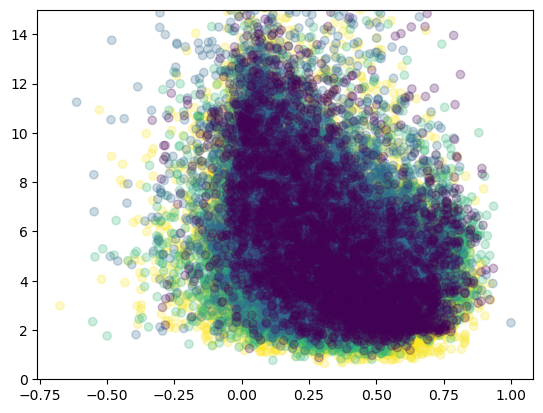

In [35]:
plt.scatter(x = df1['cor'], y = df1['u'], c = test, alpha = 0.25)
plt.ylim(0, 15)

In [38]:
df1 = df1.dropna()
df1

,,cor,u
id,years,,
0,2322,0.466978,5.734807
1,2322,0.370750,3.865227
2,2322,0.833939,4.713970
3,2322,0.603787,3.937327
5,2322,0.621027,4.025016
...,...,...,...
4316,2019,0.110135,5.290434
4317,2019,-0.021560,7.741163
4318,2019,-0.055025,6.003595


In [39]:
heatmap, xedges, yedges = np.histogram2d(x = df1['cor'], y = df1['u'], bins = 100)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

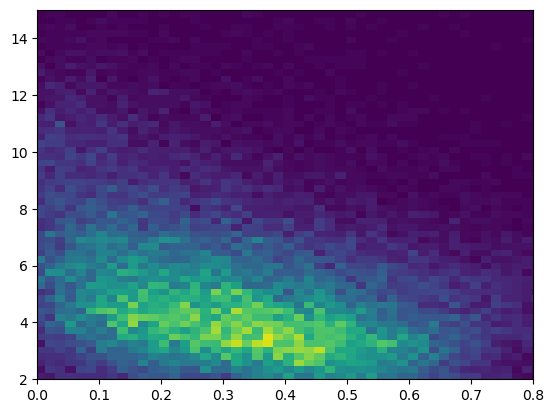

In [43]:
fig, ax = plt.subplots()
ax.imshow(heatmap.T, extent = extent, origin = 'lower', aspect = 'auto', vmin = 0, vmax = 80)
ax.set_ylim((2, 15))
ax.set_xlim((0, 0.8))

plt.show()

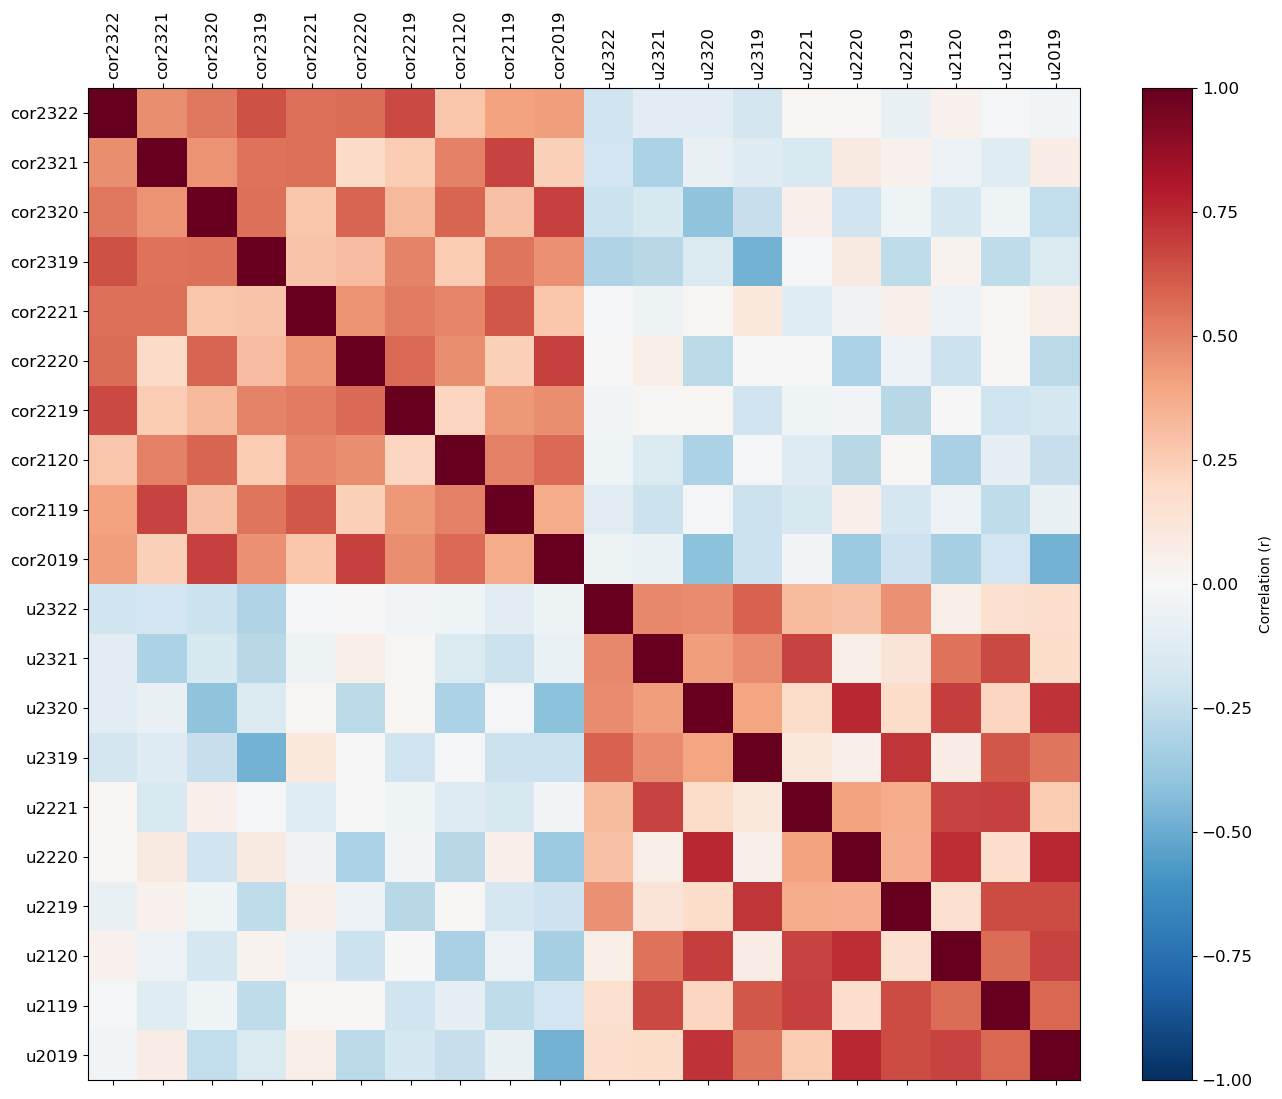

In [45]:
df = fishnet.iloc[:,2:-1]#[:,3:]

f = plt.figure(figsize=(16, 16))
plt.matshow(df.corr(), fignum=f.number, vmin = -1, vmax = 1, cmap = 'RdBu_r')
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=12, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=12)
cb = plt.colorbar(shrink = 0.8, label = 'Correlation (r)')
cb.ax.tick_params(labelsize=12)
#plt.savefig('cormat.tif', bbox_inches = 'tight', dpi = 300)

In [54]:
fishnet.iloc[:,2:12].std(axis = 1)

0       0.134527
1       0.146159
2       0.134973
3       0.068339
4            NaN
          ...   
4316    0.097854
4317    0.052966
4318    0.114202
4319    0.089709
4320    0.144532
Length: 4321, dtype: float64

In [55]:
# Calculate mean and sd year-to-year correlations
fishnet['corMean'] = fishnet.iloc[:,2:12].mean(axis = 1) 
fishnet['corSD'] = fishnet.iloc[:,2:12].std(axis = 1)
fishnet

,ID,ID_sub,cor2322,cor2321,cor2320,cor2319,cor2221,cor2220,cor2219,cor2120,...,u2319,u2221,u2220,u2219,u2120,u2119,u2019,geometry,corMean,corSD
0,365,16,0.466978,0.505905,0.490521,0.188356,0.348266,0.273793,0.307002,0.621459,...,6.633316,6.135075,6.040441,10.088098,2.985927,7.033584,6.938949,"POLYGON ((638171.882 201462.446, 636878.257 20...",0.380307,0.134527
1,365,17,0.370750,0.483067,0.457162,0.183158,0.477380,0.370783,0.083934,0.523425,...,5.471535,4.391763,4.150840,6.931163,3.217747,5.998070,5.757148,"POLYGON ((648972.823 196065.864, 648630.883 19...",0.347692,0.146159
2,365,22,0.833939,0.623655,0.903596,0.780718,0.505717,0.816568,0.734943,0.587174,...,5.216837,5.552094,5.089826,7.732782,3.412006,6.054962,5.592694,"POLYGON ((635722.827 205276.489, 635792.132 20...",0.715252,0.134973
3,365,23,0.603787,0.604335,0.668611,0.543983,0.611690,0.563006,0.428144,0.653953,...,4.007649,5.088904,4.216999,5.598639,3.777586,5.159227,4.287321,"POLYGON ((638972.823 205276.489, 638972.823 21...",0.581972,0.068339
4,365,28,NaN,NaN,NaN,-0.052861,NaN,NaN,NaN,NaN,...,6.310976,6.500000,2.750000,6.384146,5.750000,9.384147,5.634146,"POLYGON ((638714.128 215276.489, 638972.823 21...",-0.052861,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4316,1544,8,-0.002569,0.066347,0.071131,-0.049211,-0.110298,0.148838,0.094674,0.006730,...,4.827170,3.224115,3.266368,4.414707,4.099843,5.248181,5.290434,"MULTIPOLYGON (((68972.823 1085276.489, 68972.8...",0.018642,0.097854
4317,1544,9,-0.017267,0.005857,0.107491,0.012502,0.034824,-0.012160,-0.003458,-0.103884,...,7.644200,6.956298,3.166292,7.155849,7.541613,11.531170,7.741163,"POLYGON ((78972.823 1085276.489, 78972.823 108...",-0.002270,0.052966
4318,1544,10,-0.000690,0.138779,0.046326,0.151952,-0.247692,0.000687,0.043037,0.096924,...,8.312094,8.729811,3.062045,4.942141,9.791265,11.671361,6.003595,"POLYGON ((92842.641 1085276.489, 93214.728 108...",0.016715,0.114202
4319,1544,11,-0.110292,0.169543,0.040992,0.193018,-0.028148,-0.003633,-0.003559,0.018869,...,6.409075,9.075051,3.456349,5.539165,9.495169,11.577985,5.959282,"POLYGON ((98972.823 1085276.489, 98972.823 108...",0.038523,0.089709


In [56]:
fishnet.to_file('subfishnet_HBL_SDC_QUvCorr.shp')

## Testing

In [ ]:
# cors_acc = cors

In [ ]:
# [round(elem, 2) for elem in cors_fast] # Took 7 seconds

In [ ]:
# [round(elem, 2) for elem in cors_acc] # 2:20

In [ ]:
# [round(elem, 2) for elem in cors_fast] == [round(elem, 2) for elem in cors_acc]

In [ ]:
# import statistics
# statistics.mean([a_i - b_i for a_i, b_i in zip(cors_acc, cors_fast)])

In [ ]:
# [a_i - b_i for a_i, b_i in zip([round(elem, 2) for elem in cors_acc], [round(elem, 2) for elem in cors_fast])]

In [ ]:
# diff = [a_i - b_i for a_i, b_i in zip(cors_acc, cors_fast)]
# diff

In [ ]:
# pd.DataFrame(diff).hist()

In [ ]:
# pd.DataFrame(diff).mean()#.min()

In [ ]:
# minx, miny, maxx, maxy = square.geometry.values[0].bounds

# xs = [minx]
# val = minx
# while val < maxx - 30:
#     val += 30
#     xs.append(val)

# ys = [miny]
# val = miny
# while val < maxy - 30:
#     val += 30
#     ys.append(val)

In [ ]:
# square = fishnet[fishnet.index == 27171]

# minx, miny, maxx, maxy = square.geometry.values[0].bounds

# xs = [minx]
# val = minx
# while val <= maxx - 30:
#     val += 30
#     xs.append(val)

# ys = [miny]
# val = miny
# while val <= maxy - 30:
#     val += 30
#     ys.append(val)

# bv_square = bvy1823.sel(x = xs, y = ys, method = 'nearest')
# bv_square

In [ ]:
# square = fishnet[fishnet.index == 32490]

# clip = mn1823.rio.clip(square.geometry.values)
# print(clip.mean().item())

# mnq_clip = mnq1823.sel(x = clip['x'], y = clip['y'])
# print(mnq_clip.mean().item())

# bv_clip = bv1823.sel(x = clip['x'], y = clip['y'])
# print(bv_clip.mean().item())

# bvq_clip = bvq1823.sel(x = clip['x'], y = clip['y'])
# print(bvq_clip.mean().item())

# bvy_clip = bvy1823.sel(x = clip['x'], y = clip['y'])
# arr = bvy_clip.values.flatten()
# arr = arr[~np.isnan(arr)]
# mode = stats.mode(arr)
# print(mode[0].item())
# print(mode[1].item() / bvy_clip.notnull().sum().values * 100)